In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.impute import KNNImputer

Membaca Data Latih dan Uji

In [107]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [108]:
train_df.head() # Membaca 5 baris pertama data latih

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [109]:
test_df.head() # Membaca 5 baris pertama data uji

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433


In [110]:
test_ids = test_df["ID"].copy() # Menyimpan Kolom ID dari data uji untuk menyusun hasil prediksi nanti

In [111]:
train_df.drop(columns=["Surname"], inplace=True) # Menghapus kolom yang tidak terlalu penting untuk prediksi

In [112]:
train_df.isna().sum() # Melihat Kolom Yang memiliki nilai missing

,0
ID,0
CreditScore,427
Geography,0
Gender,423
Age,442
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,402


In [113]:
train_df.describe()

,ID,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,Exited
count,8030.000000,7603.000000,7588.000000,8030.000000,8030.000000,8030.000000,7664.000000,8030.000000,8030.000000,8030.000000
mean,4015.500000,650.572932,38.834212,4.997509,76760.274842,1.530386,99789.518316,3.019054,604.522540,0.199502
std,2318.205664,96.677445,10.553106,2.895015,62436.537619,0.580551,57475.475959,1.409365,226.282724,0.399651
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,91.750000,1.000000,119.000000,0.000000
25%,2008.250000,583.000000,32.000000,3.000000,0.000000,1.000000,50488.107500,2.000000,408.000000,0.000000
50%,4015.500000,651.000000,37.000000,5.000000,97562.950000,1.000000,100088.080000,3.000000,602.000000,0.000000
75%,6022.750000,717.000000,44.000000,7.000000,127849.000000,2.000000,149185.215000,4.000000,799.000000,0.000000
max,8030.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000,1.000000


In [114]:
imputer = KNNImputer(n_neighbors=5) # Mengatasi Nilai Yang Hilang dengan KNN Imputer
numeric_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Point Earned"]
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])

In [115]:
train_df.Gender.value_counts()

,count
Gender,
Male,4162
Female,3445


In [116]:
train_df.Gender.fillna(value = "Male", inplace = True) #Mengatasi nilai kolom Gender yang hilang dengan nilai "Male"

<ipython-input-116-5a751f130c48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.Gender.fillna(value = "Male", inplace = True) #Mengatasi nilai kolom Gender yang hilang dengan nilai "Male"


In [117]:
train_df.IsActiveMember.value_counts()

,count
IsActiveMember,
Yes,3948
No,3680


In [118]:
train_df.IsActiveMember.fillna(value = "Yes", inplace = True) # Mengatasi nilai Kolom IsActiveMember engan nilai "Yes"

<ipython-input-118-a392b7fc5653>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.IsActiveMember.fillna(value = "Yes", inplace = True) # Mengatasi nilai Kolom IsActiveMember engan nilai "Yes"


In [119]:
train_df.isna().sum() # Mengecek kembali apakah masih ada kolom dengan nilai yang hilang

,0
ID,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


Melakukan Exploratory Data Analysis (EDA)


### Missing Values ###
ID                    0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64

### Duplicate Rows ###
0

### Summary Statistics ###
                ID  CreditScore          Age       Tenure        Balance  \
count  8030.000000  8030.000000  8030.000000  8030.000000    8030.000000   
mean   4015.500000   650.669215    38.879477     4.997509   76760.274842   
std    2318.205664    94.557698    10.315540     2.895015   62436.537619   
min       1.000000   350.000000    18.000000     0.000000       0.000000   
25%    2008.250000   587.000000    32.000000     3.000000       0.000000   
50%    4015.500000   652.000000    37.000000     5.000000   97562.950

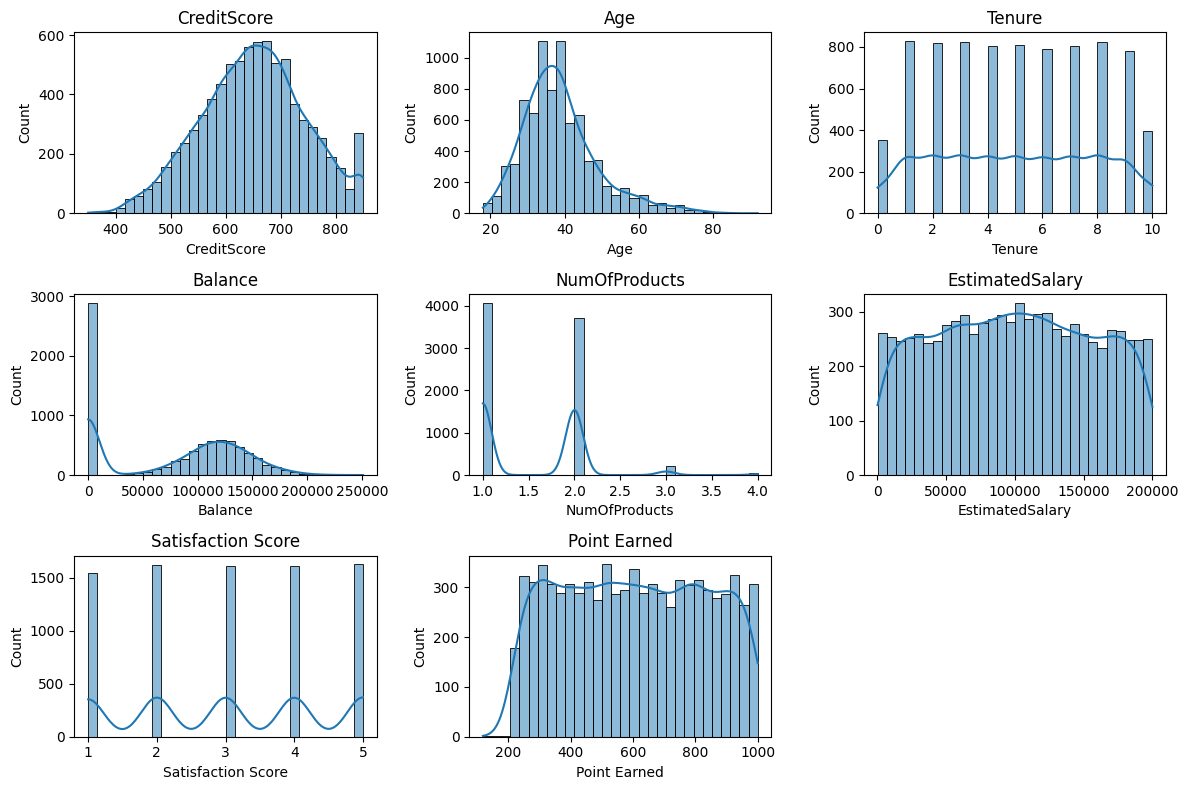

<Figure size 1000x600 with 0 Axes>

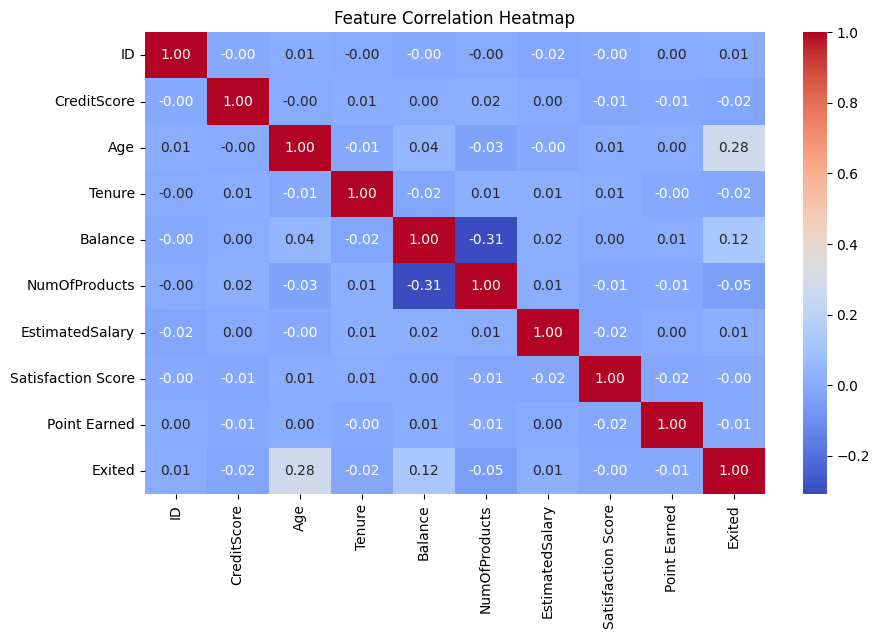

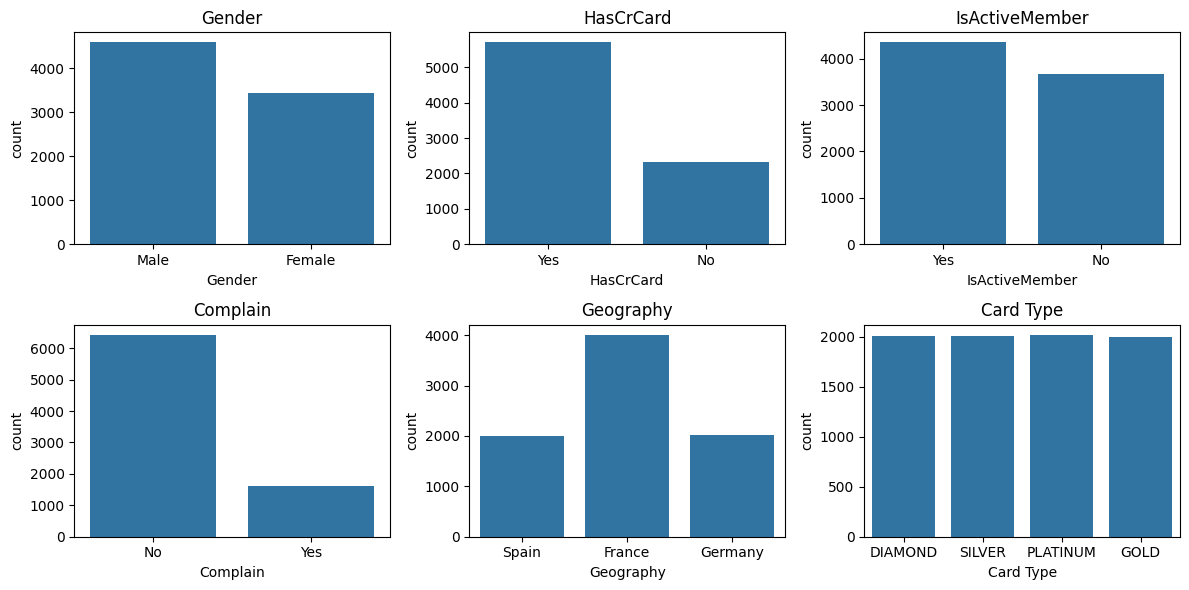

In [120]:


print("\n### Missing Values ###")
print(train_df.isnull().sum())

print("\n### Duplicate Rows ###")
print(train_df.duplicated().sum())

print("\n### Summary Statistics ###")
print(train_df.describe())

# Visualisasi distribusi fitur numerik
numeric_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Point Earned"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualisasi hubungan antar fitur numerik menggunakan heatmap
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

# Visualisasi fitur kategorikal
categorical_cols = ["Gender", "HasCrCard", "IsActiveMember", "Complain", "Geography", "Card Type"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=train_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [121]:
# Encoding fitur kategorikal
label_encoders = {}
categorical_cols = ["Gender", "HasCrCard", "IsActiveMember", "Complain"]

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# One-hot encoding untuk fitur geografis dan tipe kartu
train_df = pd.get_dummies(train_df, columns=["Geography", "Card Type"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Geography", "Card Type"], drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])


In [122]:
# Split data untuk training dan validation
X = train_df.drop(columns=["Exited"])
y = train_df["Exited"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Tranining
# Menggunakan Random Forest sebagai model klasifikasi
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Model Evaluation
# Memprediksi hasil pada data validasi
y_pred = clf.predict(X_val)
y_pred = clf.predict(X_val)
y_pred_proba = clf.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Model Inference
# Memastikan test_df memiliki kolom yang sama dengan X_train
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[X_train.columns]

# Memprediksi hasil pada dataset uji
test_df["Exited"] = clf.predict(test_df)

# Menyimpan hasil prediksi ke dalam file CSV
submission = pd.read_csv('sample_submission.csv')

submission


Accuracy: 0.9987546699875467
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       0.99      1.00      1.00       308

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,1
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,1
1998,3999,0


In [123]:
# Menyimpan hasil prediksi ke dalam file CSV
submission['Exited'] = test_df['Exited']

submission

submission.to_csv('submission.csv', index=False)

In [124]:
test_df['Exited'].value_counts()

,count
Exited,
0,1556
1,444
